In these notebooks I will be documenting my progress on learning tensorflow for machine learning.

# Linear regression with tensorflow

In this notebook I am replicating my learning steps through the **Deep learning with tensorflow course of IBM Cognitive Class** 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

Create data with a linear regression shape

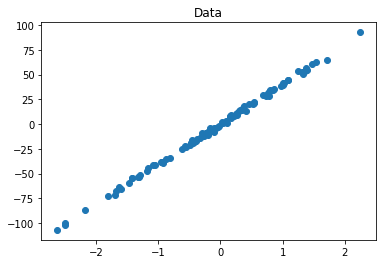

In [4]:
X_data,y_data = make_regression(n_samples=100,n_features=1,noise=1.5)
plt.scatter(X_data,y_data)
plt.title('Data')
plt.show()

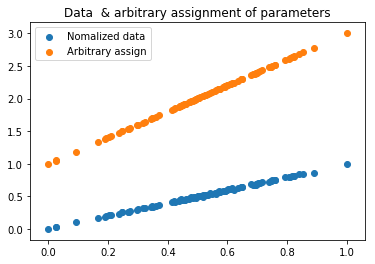

In [37]:


m = tf.Variable(2.0)
b = tf.Variable(1.0)
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

Xn = tf.Variable(np.zeros(X_data.shape).astype('float32'))
yn = tf.Variable(np.zeros(y_data.shape).astype('float32'))

#Normalize the data
norm_x = tf.assign(Xn,tf.divide((tf.subtract(X,tf.reduce_min(X))),(tf.subtract(tf.reduce_max(X),tf.reduce_min(X)))))
norm_y = tf.assign(yn,tf.divide((tf.subtract(Y,tf.reduce_min(Y))),(tf.subtract(tf.reduce_max(Y),tf.reduce_min(Y)))))

y_pred = tf.add(tf.multiply(Xn,m),b)

init_op = tf.global_variables_initializer()
with tf.Session() as s:
    s.run(init_op)
    normed_x,normed_y = s.run([norm_x,norm_y],feed_dict={X:X_data,Y:y_data})
    ry = s.run(y_pred,feed_dict={X:X_data})

plt.scatter(normed_x,normed_y,label="Nomalized data")
plt.scatter(normed_x,ry,label="Arbitrary assign")
plt.legend()
plt.title('Data  & arbitrary assignment of parameters')
plt.show()



In [33]:
loss = tf.reduce_mean(tf.squared_difference(y_pred,yn))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(loss)

temp_loss = tf.Variable(0.0)
init_loss = tf.placeholder(tf.float32)

diff_loss = tf.abs(tf.subtract(temp_loss,loss))

init_op = tf.global_variables_initializer()

steps = np.arange(0,10000,1)
steps_n = len(steps)

opt_dict = {}
opt_dict['m']=[]
opt_dict['b']=[]
opt_dict['loss']=[]

convergence_diff_loss = 0.00001

with tf.Session() as s:
    s.run(init_op)
    normed_x,normed_y = s.run([norm_x,norm_y],feed_dict={X:X_data,Y:y_data})
    r_train, r_m, r_b, r_loss = s.run([train,m,b,loss],feed_dict={X:X_data,Y:y_data})
    s.run(tf.assign(temp_loss,r_loss))

    opt_dict['m'].append(r_m)
    opt_dict['b'].append(r_b)
    opt_dict['loss'].append(r_loss)
    
    for i,step in enumerate(steps):
        r_train, r_m, r_b, r_loss, d_loss = s.run([train,m,b,loss,diff_loss],feed_dict={X:X_data,Y:y_data})
        s.run(tf.assign(temp_loss,r_loss))
        
        if d_loss < convergence_diff_loss:
            print("Convergence reached at step: ",i)
            break
        else:
            opt_dict['m'].append(r_m)
            opt_dict['b'].append(r_b)
            opt_dict['loss'].append(r_loss)
    s.run([tf.assign(m,r_m),tf.assign(b,r_b)])
    final_y = s.run(y_pred,feed_dict={X:X_data})
print("Done")


Convergence reached at step:  1906
Done


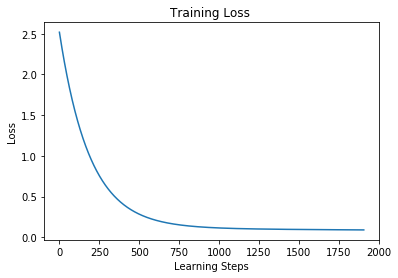

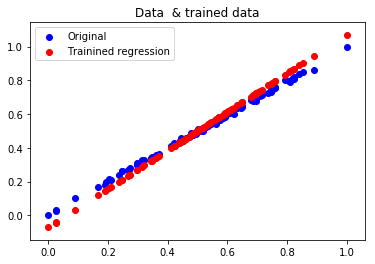

In [35]:
plt.plot(np.arange(0,len(opt_dict['loss'])),opt_dict['loss'])
plt.title('Training Loss ')
plt.ylabel('Loss')
plt.xlabel('Learning Steps')
plt.show()

#final_y = opt_dict['m'][-1]*X_data+opt_dict['b'][-1]

plt.scatter(normed_x,normed_y,label="Original",c='b')
plt.scatter(normed_x,final_y,label="Trainined regression",c='r')
plt.legend()
plt.title('Data  & trained data')
plt.show()


# References

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression  
https://courses.cognitiveclass.ai/courses/course-v1:BigDataUniversity+ML0120EN+2016/info  
